In [3]:
from graph_patrol_env import GraphPatrolEnv
from patrolling_zoo.env.patrol_graph import PatrolGraph

from time import sleep
from IPython.display import clear_output

In [4]:
G = PatrolGraph("patrolling_zoo/env/cumberland.graph")

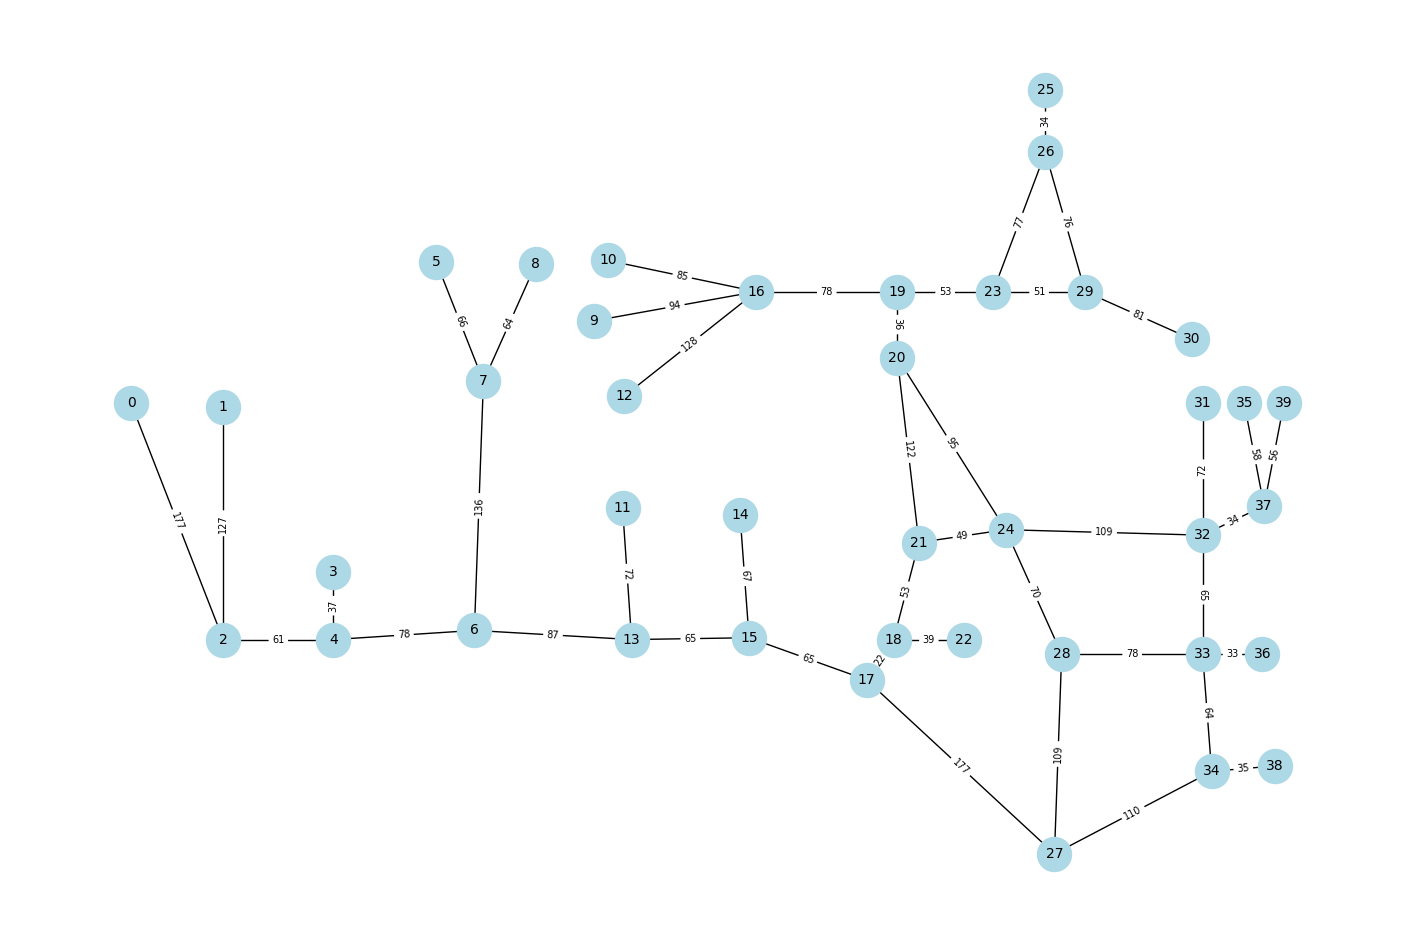

In [5]:
G.PlotGraph()

In [6]:
World = GraphPatrolEnv(G, 3)
World.observations

{'agent_0': 24, 'agent_1': 18, 'agent_2': 32}

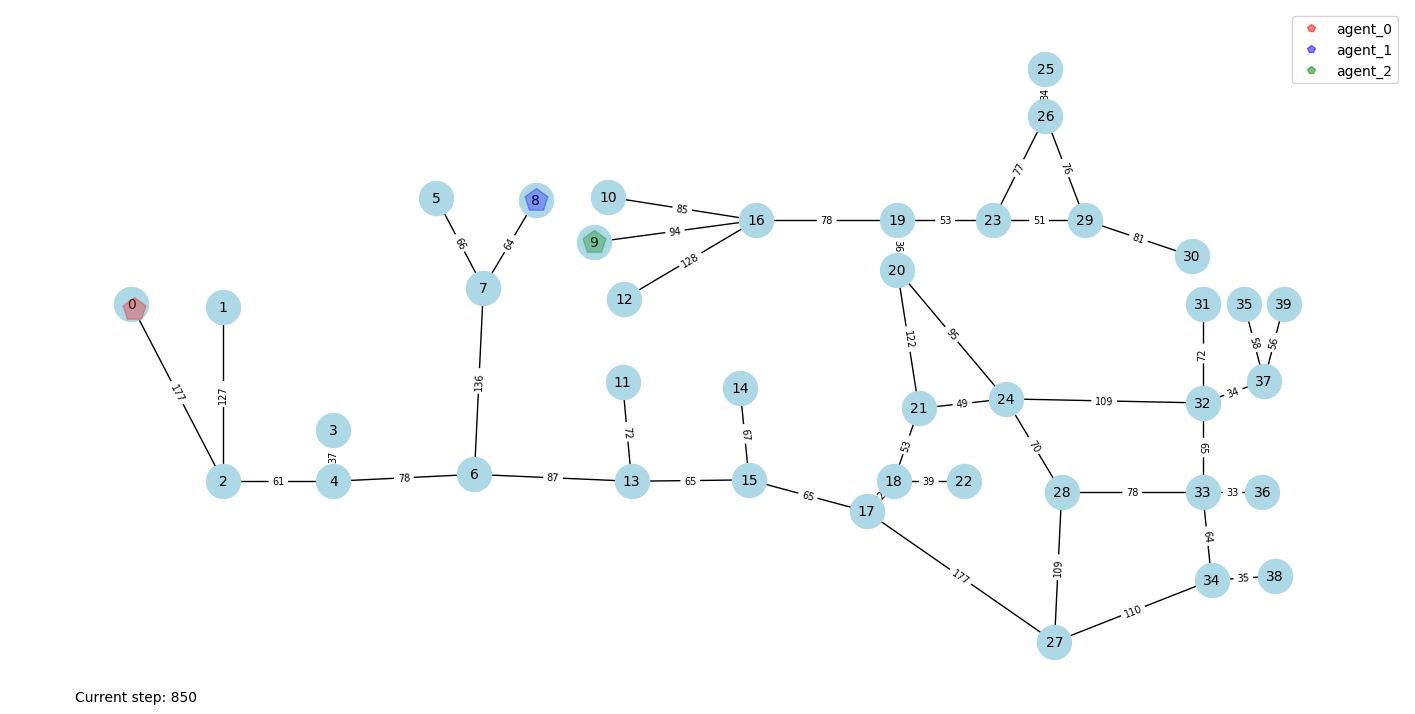

In [8]:
World = GraphPatrolEnv(G, 3)

k=0
while not(World.observations["agent_0"] == 0  and World.observations["agent_1"] == 8):
    World.step({"agent_0": 0, "agent_1": 8, "agent_2": 9})
    k+=1
    if k%10 == 0:
        World.plot_world(figsize=(18,9))
        clear_output(wait=True)

    if k == 1000:
        break
